<a href="https://colab.research.google.com/github/thomaslevasseur/IN104_Levasseur_Crouzet/blob/main/PDP_multiclass_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pdpbox

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots


Text(0.5, 1.0, 'Sepal Length VS Width')

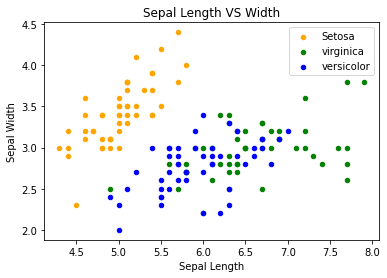

In [ ]:
iris = pd.read_csv("Iris2.csv")   

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
fig = iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")


Text(0.5, 1.0, 'Petal Length VS Width')

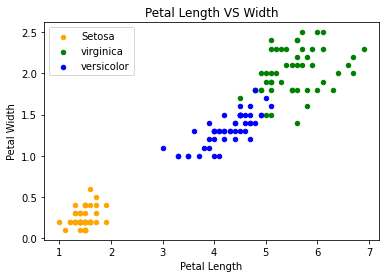

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica',ax=fig)
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")

In [ ]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithmc

In [ ]:
train, test = train_test_split(iris, test_size = 0.3)
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data
print(train)
print(test)

      Id  SepalLengthCm  ...  PetalWidthCm          Species
127  128            6.1  ...           1.8   Iris-virginica
57    58            4.9  ...           1.0  Iris-versicolor
12    13            4.8  ...           0.1      Iris-setosa
22    23            4.6  ...           0.2      Iris-setosa
108  109            6.7  ...           1.8   Iris-virginica
..   ...            ...  ...           ...              ...
2      3            4.7  ...           0.2      Iris-setosa
43    44            5.0  ...           0.6      Iris-setosa
31    32            5.4  ...           0.4      Iris-setosa
139  140            6.9  ...           2.1   Iris-virginica
110  111            6.5  ...           2.0   Iris-virginica

[105 rows x 6 columns]
      Id  SepalLengthCm  ...  PetalWidthCm          Species
85    86            6.0  ...           1.6  Iris-versicolor
32    33            5.2  ...           0.1      Iris-setosa
0      1            5.1  ...           0.2      Iris-setosa
36    37        

In [ ]:
model = KNeighborsClassifier(n_neighbors=3) #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output

The accuracy is: 0.9777777777777777


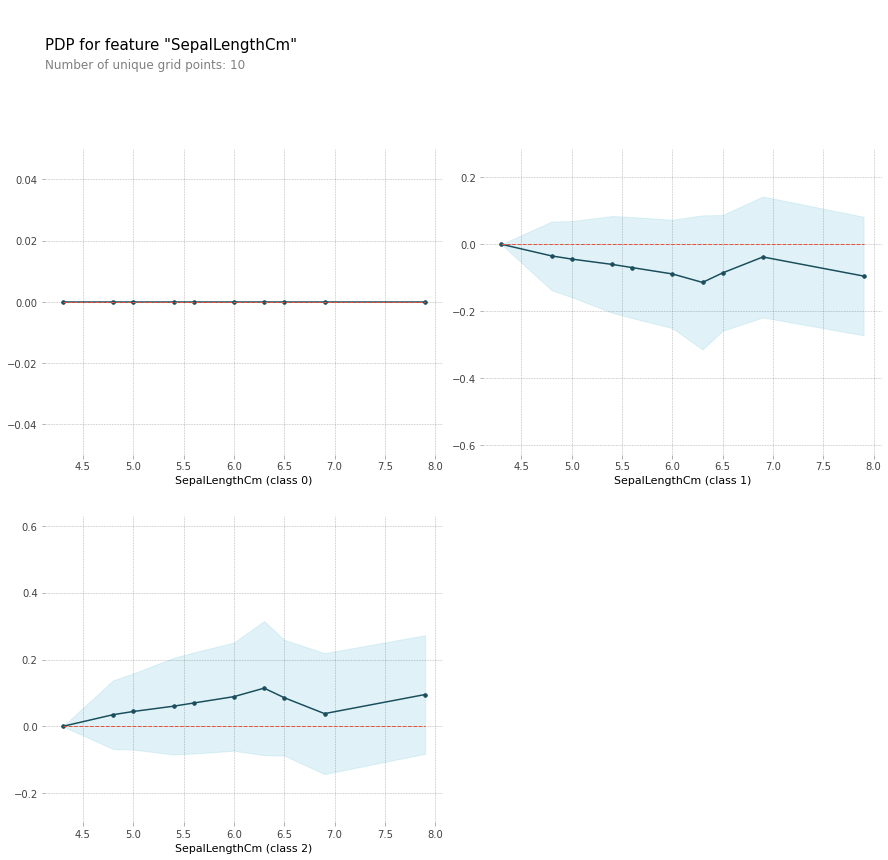

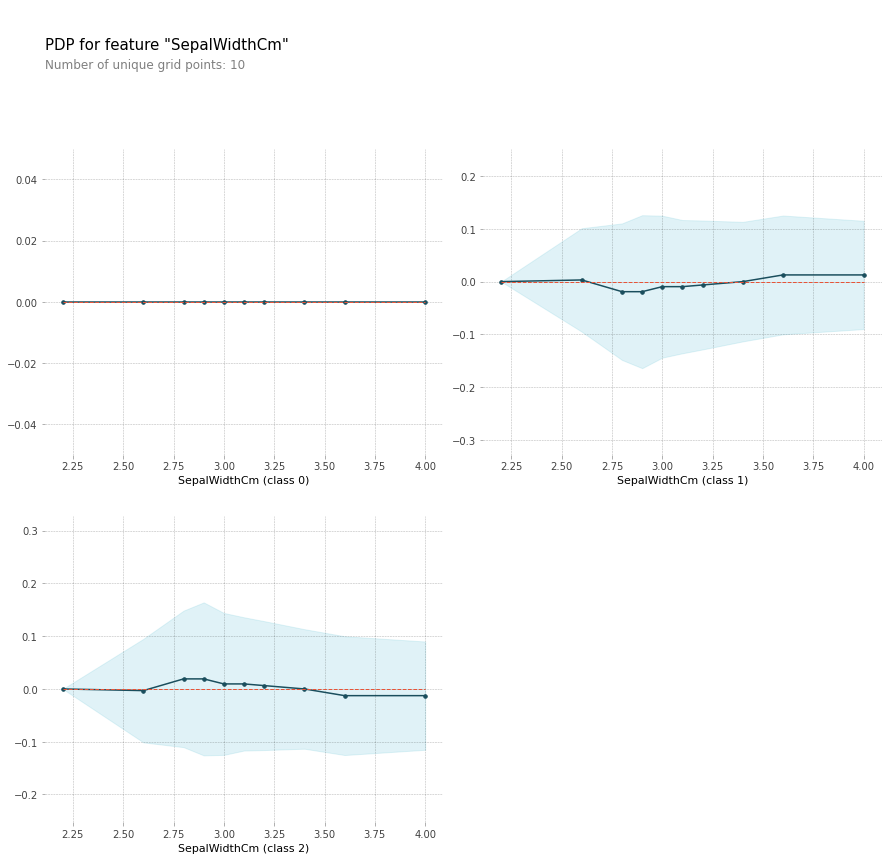

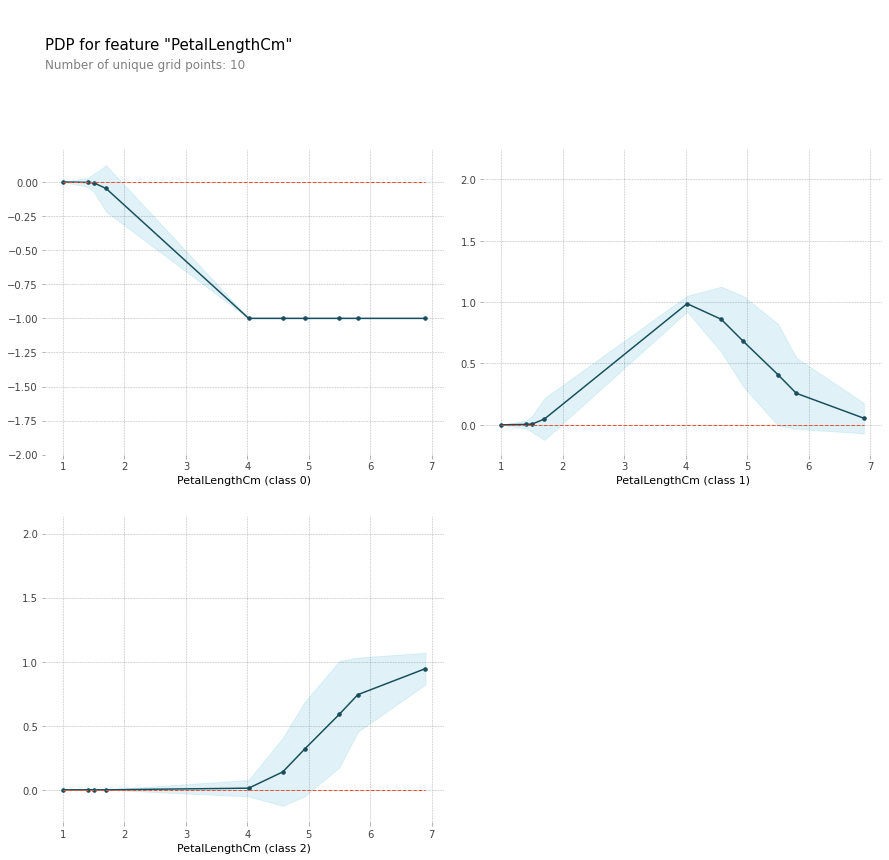

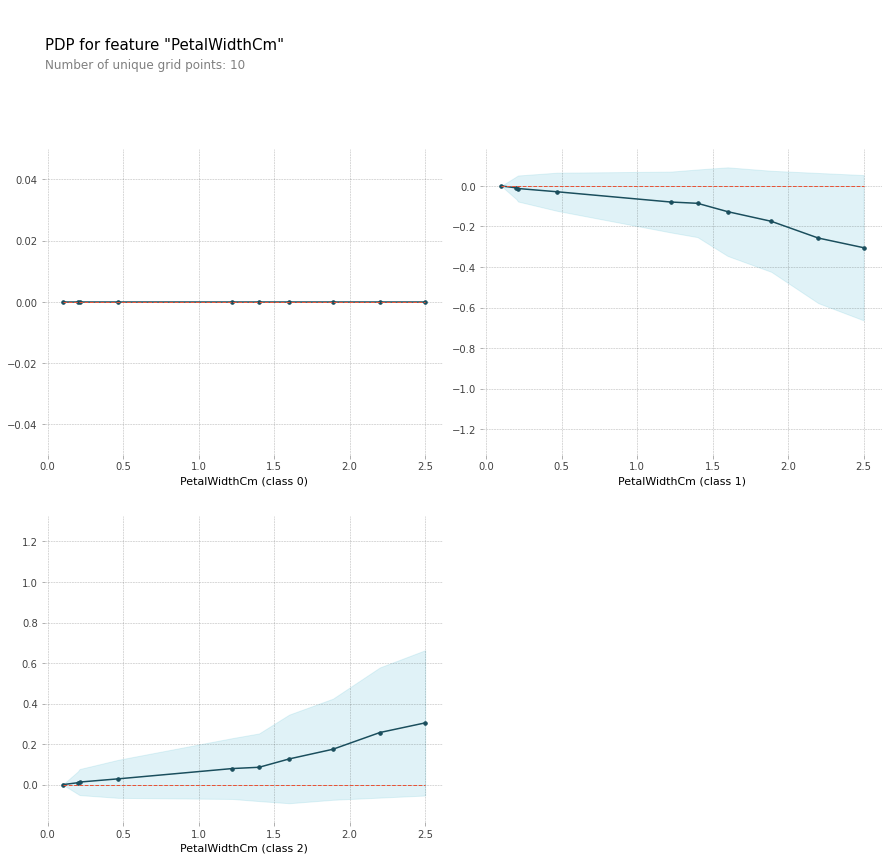

In [ ]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in range (4):
 
    pdp_goals = pdp.pdp_isolate(model=model, dataset=train_X, model_features=features, feature=features[i])
    
    pdp.pdp_plot(pdp_goals, features[i])
    plt.show()